##### MATH 6388: Statistical and Machine Learning, Fall 2022 
### Homework 4

### Problem 1

Consider a logistic regression model with weights $\boldsymbol{\theta}$ and a given data point $\mathbf{x}\in\mathbb{R}^3$:

$$\boldsymbol{\theta}=\begin{bmatrix}-\log 4 \\ \log 2 \\ -\log 3\end{bmatrix}, \;\;\mathbf{x}=\begin{bmatrix}1 \\ 1\\ 1\end{bmatrix}$$

What is the probability that $y=0$?

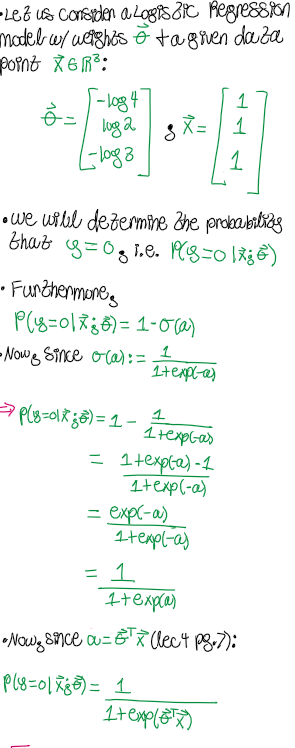

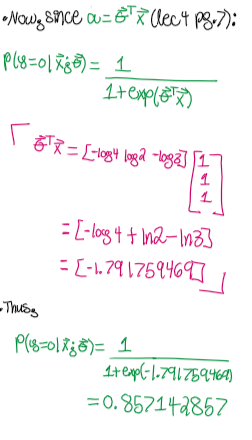

### Problem 2

Assume that we trained a logistic regression model for a binary classification problem with $y\in\{0,1\}$ and our class probabilities can be found by

$$f(\mathbf{x};\boldsymbol{\theta})=\sigma\big(\mathbf{w}^T\mathbf{x} + b\big)$$

where $\mathbf{x}=[x_1,\ldots,x_D]\in\mathbb{R}^D$, $\mathbf{w}=[w_1,\ldots,w_D]\in\mathbb{R}^D$, $b\in\mathbb{R}$ is the bias term, and $\sigma$ is the sigmoid or logistic function. Therefore, in this setting, we are not using the $x_0=1$ trick and we are explicitly representing the bias term. Moreover, assume that we slightly change the classification rule as follows

$$y \text{ is } 1 \text{ if } f(\mathbf{x};\boldsymbol{\theta})> 0.7$$

Show that this corresponds to a linear decision boundary in the input space.

Hint: You may want to use Python to evaluate the logit function, i.e., the inverse of logistic function, at $0.7$.

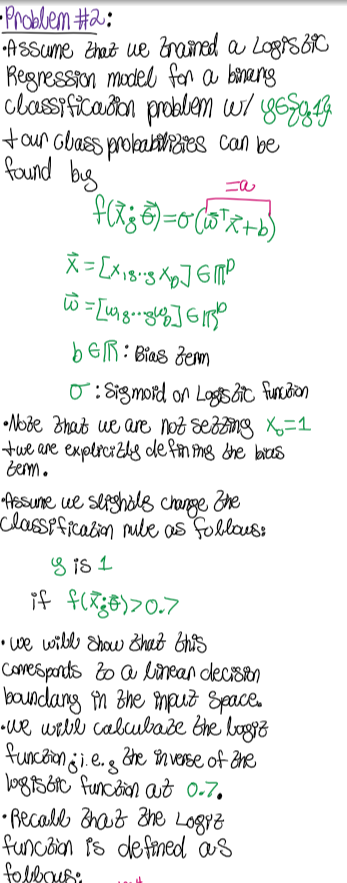

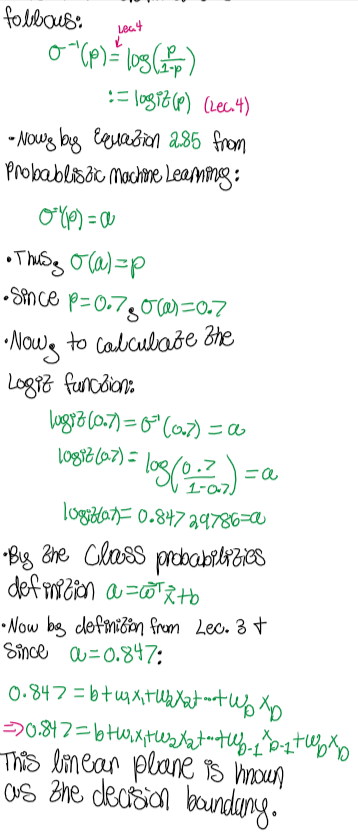

### Problem 3

Looking at the [documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for logistic regression, it appears that there is no option to apply the above classification rule, i.e., using the threshold value of 0.7 instead of 0.5 to predict $y=1$. Given the code provided below, how can we add one or two lines of code to make predictions using the threshold value of 0.7?

In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, centers=2, cluster_std=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test) # here, predictions are made based on the threshold value of 0.5 

# your code here to change the prediction rule 

threshold = 0.7
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_soln = (y_pred_prob > threshold).astype(bool)

### Problem 4 

In this problem, you work with the Social Network Ads dataset, which tells which of the users purchased/not purchased a particular product based on some features, such as age and salary. 

(a) import the given csv file and find the number of samples and features. 

In [2]:
# Import th egiven csv file 
social_data = pd.read_csv('C:/Users/12563/Documents/Statistical & Machine Learning (MATH 6388)/Homework/Homework 4/Social_Network_Ads.csv')

In [3]:
social_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


We have 400 samples (400 unique User IDs) in this dataset with 4 associated features (Gender, Age, Estimated Salary, and Purchased)

(b) Let us ignore 'User ID' and 'Gender' Columns. Form the data matrix $\mathbf{X}$ using 'Age' and 'EstimatedSalary' columns, and the response/label vector $\mathbf{y}$ will contain binary values given in the 'Purchased' column. Make sure that $\mathbf{X}$ and $\mathbf{y}$ are NumPy arrays. 

In [5]:
# Form the data matrix X using Age & Estimated Salary features
X_ = social_data[['Age', 'EstimatedSalary']]

# Form the Data Matrix y using Purchased feature
y_ = social_data['Purchased']

# Convert X & y to numpy arrays

X_ = X_.to_numpy()
y_ = y_.to_numpy()

(c) Split the dataset into the Training set(%75) and Test set(%25) using "train_test_split" from sklearn.model_selection.

In [17]:
# Split the data into train and test sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size= 0.25, train_size=0.75, random_state=1)

(d) Scale the two input features using "StandardScaler" from "sklearn.preprocessing". Note that you have to scale/transform both X_train and X_test. 

In [18]:
# Define Standard Scaler
scaler = StandardScaler()

# Transform Data
scaled_train = scaler.fit_transform(X_train_)
scaled_test = scaler.fit_transform(X_test_)

(e) Train the logistic regression model using (X_train, y_train) and evaluate the accuracy using (X_test, y_test). Please do not use any built-in evaluation metrics from sklearn and write your own function to compute the ratio of correctly classified samples to the total number of predictions. 

In [19]:
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 7)
log_reg.fit(X_train_, y_train_)

LogisticRegression(random_state=7)

In [20]:
y_pred = log_reg.predict(X_test_)

In [21]:
pred_correct = np.sum(y_pred == y_test_)
ratio_correct = pred_correct/len(y_pred)
print('The ratio of correctly classifised samples to the total number of predictions is the following:', ratio_correct)

The ratio of correctly classifised samples to the total number of predictions is the following: 0.84
